# Lab 2 Data Analysis
Group: IP-91

Var: 6

Students:
- Geleshko D.
- Vlasov A.

## Imports

In [61]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Config

In [62]:
np.random.seed(6)

plt.rcParams["figure.figsize"] = (20, 8)
# pd.set_option("display.max_columns", None)
pd.options.display.float_format ="{:,.3f}".format

# Reading data from .csv file

In [63]:
df = pd.read_csv("Birthweight.csv", index_col="ID")
df

,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
ID,,,,,,,,,,,,,,,
1360,56,4.550,34,44,0,20,0,162,57,23,10,35,179,0,0
1016,53,4.320,36,40,0,19,0,171,62,19,12,0,183,0,0
462,58,4.100,39,41,0,35,0,172,58,31,16,25,185,0,1
1187,53,4.070,38,44,0,20,0,174,68,26,14,25,189,0,0
553,54,3.940,37,42,0,24,0,175,66,30,12,0,184,0,0
1636,51,3.930,38,38,0,29,0,165,61,31,16,0,180,0,0
820,52,3.770,34,40,0,24,0,157,50,31,16,0,173,0,0
1191,53,3.650,33,42,0,21,0,165,61,21,10,25,185,0,0
1081,54,3.630,38,38,0,18,0,172,50,20,12,7,172,0,0


## Stats

In [64]:
df.describe()

,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000
mean,51.333,3.313,34.595,39.190,0.524,25.548,9.429,164.452,57.500,28.905,13.667,17.190,180.500,0.143,0.095
std,2.936,0.604,2.400,2.643,0.505,5.666,12.512,6.504,7.198,6.864,2.160,17.308,6.978,0.354,0.297
min,43.000,1.920,30.000,33.000,0.000,18.000,0.000,149.000,45.000,19.000,10.000,0.000,169.000,0.000,0.000
25%,50.000,2.940,33.000,38.000,0.000,20.250,0.000,161.000,52.250,23.000,12.000,0.000,175.250,0.000,0.000
50%,52.000,3.295,34.000,39.500,1.000,24.000,4.500,164.500,57.000,29.500,14.000,18.500,180.500,0.000,0.000
75%,53.000,3.647,36.000,41.000,1.000,29.000,15.750,169.500,62.000,32.000,16.000,25.000,184.750,0.000,0.000
max,58.000,4.570,39.000,45.000,1.000,41.000,50.000,181.000,78.000,46.000,16.000,50.000,200.000,1.000,1.000


## Taks 1: Mean Height of Children

In [65]:
u = df["Length"].mean()
print(u)

51.333333333333336


## Task 2: Test whether #cigarettes per day is normaly distributed

In [66]:
# H0: normal, alpha = 0.05
print("#cigarettes per day:\n",
stats.normaltest(df["mnocig"]))
# H0 can be rejected

#cigarettes per day:
 NormaltestResult(statistic=14.17450709587283, pvalue=0.000835689397558462)


In [67]:
# H0: normal, alpha = 0.05
print("#cigarettes per day, only smokers:\n", 
stats.normaltest(df["mnocig"][df["smoker"] == 1]))
# H0 can't be rejected

#cigarettes per day, only smokers:
 NormaltestResult(statistic=4.6688773439793465, pvalue=0.09686484021681536)


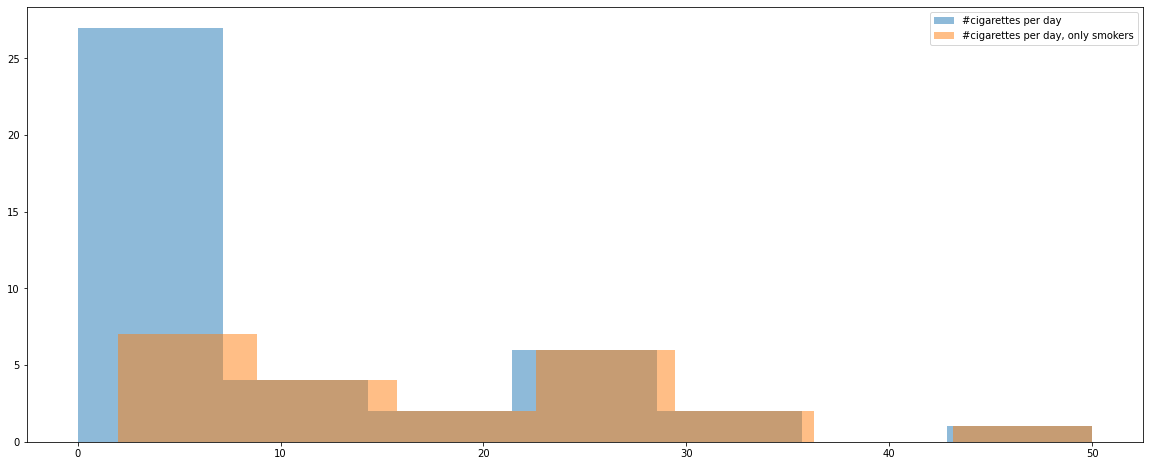

In [83]:
plt.hist(df["mnocig"], bins=7, alpha=0.5, label="#cigarettes per day")
plt.hist(df["mnocig"][df["smoker"] == 1], bins=7, alpha=0.5, label="#cigarettes per day, only smokers")
plt.legend()
plt.show()


## Task 3: Test whether mother of age 35+ have lighter children

In [84]:
# H0 mother age comes from normal distribution, alpha = 0.05
stats.normaltest(df["mage"])
# H0 can't be rejected

NormaltestResult(statistic=4.741367469588506, pvalue=0.09341683209873608)

[]

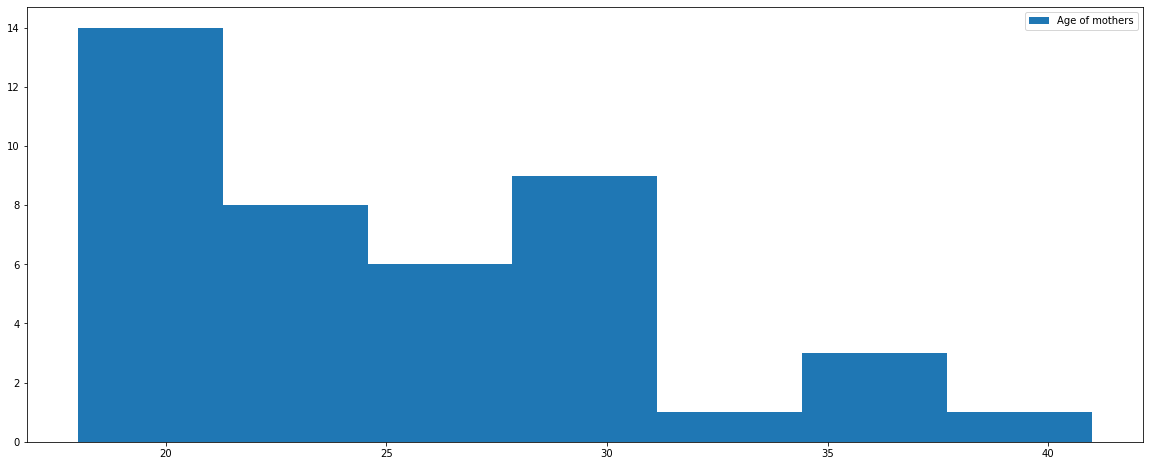

In [88]:
plt.hist(df["mage"], bins=7, label="Age of mothers")
plt.legend()
plt.plot()

In [ ]:
# H0 mother age comes from normal distribution, alpha = 0.05
stats.normaltest(df["Birthweight"])
# H0 can't be rejected

NormaltestResult(statistic=0.1049044833363354, pvalue=0.9488996378374451)

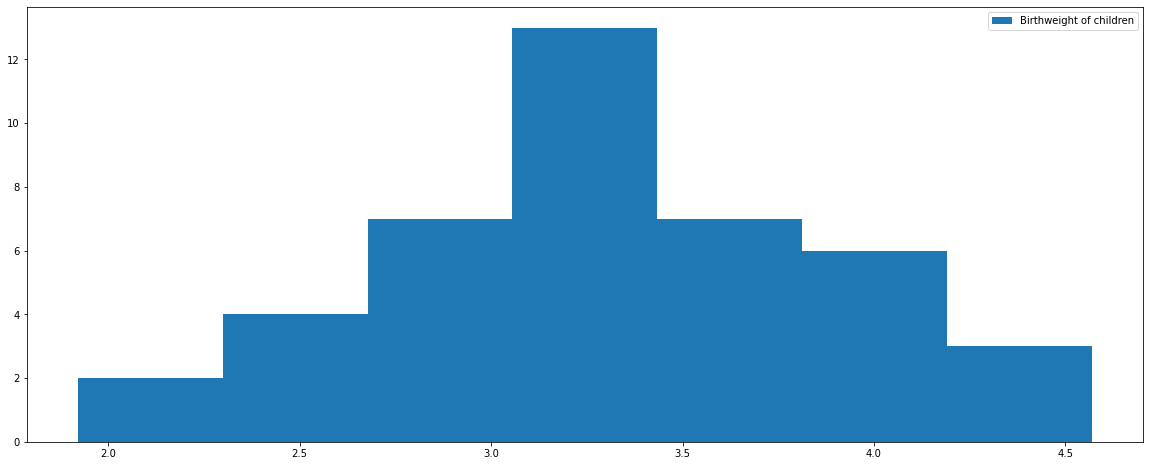

In [90]:
plt.hist(df["Birthweight"], bins=7, label="Birthweight of children")
plt.legend()
plt.show()

In [99]:
# Birthweight and age of mothers come from normal distributions --> test pearsonr correlation
stats.pearsonr(df["Birthweight"], df["mage"])
# Data is uncorralated

# p-value roughly indicates the probability
# of an uncorrelated system producing datasets that have a Pearson correlation
# at least as extreme as the one computed from these datasets.

(0.00017310227690844893, 0.9991319221053567)

## Task 4: Test correlation between birthweight and gestation

In [94]:
# H0: normal, alpha = 0.05
stats.normaltest(df["Gestation"])
# H0 can't be rejected

NormaltestResult(statistic=2.470336463160735, pvalue=0.29078583889150494)

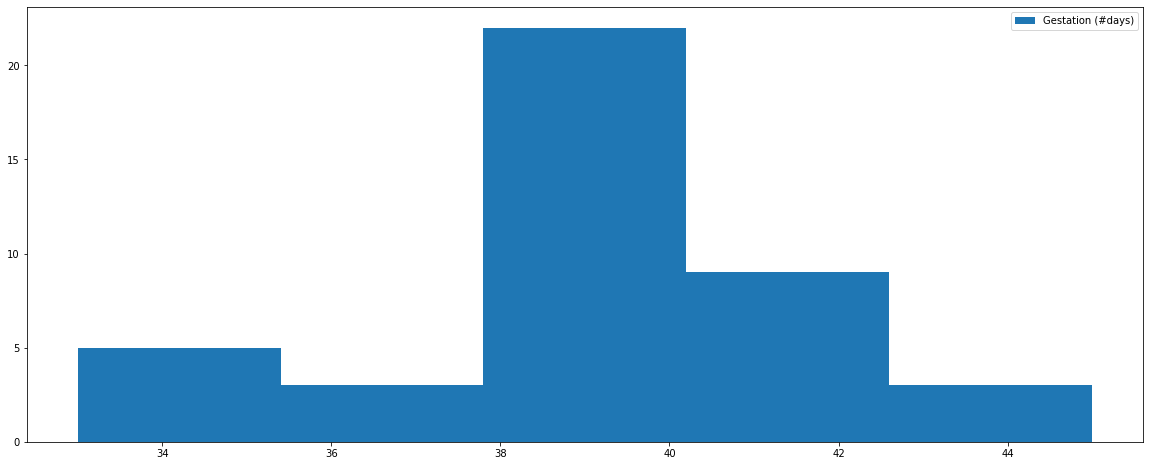

In [96]:
plt.hist(df["Gestation"], bins=5, label="Gestation (#days)")
plt.legend()
plt.show()

In [97]:
# Birthweight and gestation come from normal distributions --> test peaarsonr correlation
stats.pearsonr(df["Gestation"], df["Birthweight"])
# Data is pos. corralated

# p-value roughly indicates the probability
# of an uncorrelated system producing datasets that have a Pearson correlation
# at least as extreme as the one computed from these datasets.

(0.7083028937020825, 1.5422950863895993e-07)